# Machine Learning - Non-Linear Regression Model - Supervised Learning

- K Nearest Neighbors

- Support Vector 

- Artificial Neural Network

- CART (Classification and Regression)

- Random Forest

- Gradient Boosting Machines

- XGBoost

- Light GBM

- CatBoost (Categorical Boosting)

## K-Nearest Neighbors Algorithm

A supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).


![KNN](./knn.jpeg)

**Source:**

[Towards Data Science](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:~:text=KNN%20works%20by%20finding%20the,in%20the%20case%20of%20regression)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [ ]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
226,547.0,137.0,2.0,58.0,47.0,12.0,2.0,1038.0,271.0,3.0,129.0,80.0,24.0,261.0,459.0,22.0,0,1,0
220,299.0,75.0,6.0,38.0,23.0,26.0,3.0,580.0,160.0,8.0,71.0,33.0,44.0,212.0,1.0,2.0,1,0,1
128,584.0,158.0,15.0,70.0,84.0,42.0,5.0,2358.0,636.0,58.0,265.0,316.0,134.0,331.0,20.0,4.0,1,0,1
222,381.0,110.0,9.0,61.0,45.0,32.0,7.0,3015.0,834.0,40.0,451.0,249.0,168.0,228.0,7.0,5.0,1,0,1
81,255.0,70.0,7.0,49.0,35.0,43.0,15.0,6311.0,1661.0,154.0,1019.0,608.0,820.0,51.0,54.0,8.0,1,0,1


In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
# Automatically the model assign k value as 5
# We will check the k value optimisation later
knn_model.n_neighbors

5

In [ ]:
knn_model.metric

'minkowski'

In [ ]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'sc

In [ ]:
knn_model.predict(X_test)[0:5]

array([510.3334, 808.3334, 762.5   , 125.5   , 995.    ])

In [ ]:
# Prediction
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

404.7724696402799

In [ ]:
# Model Tuning
RMSE = []

for k in range(0,10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "RMSE:", rmse, "\n")

k= 1 RMSE: 419.07720589645663 

k= 2 RMSE: 378.0502277324553 

k= 3 RMSE: 392.2975443521745 

k= 4 RMSE: 394.25060391156745 

k= 5 RMSE: 404.7724696402799 

k= 6 RMSE: 407.0381633460914 

k= 7 RMSE: 400.1880716892174 

k= 8 RMSE: 394.1365904297106 

k= 9 RMSE: 398.66638869213017 

k= 10 RMSE: 395.8693412183635 



In [ ]:
# GridSearchCV
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [ ]:
# Tuned Final Model
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [ ]:
# Prediction
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

392.2975443521745

## Support Vector Regression

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.


![SVM](./svm_reg.png)

**Source:**

[Towards Data Science](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

In [51]:
# Model and Prediction
# We can change the svr kernel and we can try "rbf"
svr_model = SVR("linear").fit(X_train, y_train)
svr_model

SVR(kernel='linear')

In [52]:
svr_model.predict(X_train)[0:5]

array([300.20165327, 169.45346536, 519.37057457, 562.50758983,
       686.05766456])

In [53]:
svr_model.predict(X_test)[0:5]

array([612.39761763, 556.79707247, 781.07233085, 306.47278181,
       498.52104898])

In [54]:
svr_model.intercept_

array([-43.67922349])

In [55]:
svr_model.coef_

array([[ -1.52738022,   8.41603061,  -0.62248071,  -2.91633012,
         -1.76348539,   4.05664922,   9.59333169,   0.01942209,
         -0.6897988 ,   0.0252315 ,   1.61711037,   0.83482588,
         -0.89443894,   0.25664992,   0.21656721,  -1.24359453,
          2.77033446, -14.48688936,   0.46266861]])

In [56]:
# Test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

364.68986308043964

In [57]:
# Model Tuning
svr_model = SVR("linear")
svr_model

SVR(kernel='linear')

In [58]:
# Defining penalty coef
svr_params = {"C": [0.1, 0.5, 1, 3]}

In [59]:
svr_cv_model = GridSearchCV(svr_model, svr_params , cv=5, verbose= 2, n_jobs= -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   12.2s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   43.4s finished


In [60]:
svr_cv_model.best_params_

{'C': 0.1}

In [61]:
svr_tuned = SVR("linear", C = 0.1).fit(X_train, y_train)

In [62]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

373.0293805913751

## Artificial Neural Network

An artificial neural network (ANN) is the piece of a computing system designed to simulate the way the human brain analyzes and processes information. It is the foundation of artificial intelligence (AI) and solves problems that would prove impossible or difficult by human or statistical standards. ANNs have self-learning capabilities that enable them to produce better results as more data becomes available.

![ANN](./ann.png)

**Source:**

[Investopia](https://www.investopedia.com/terms/a/artificial-neural-networks-ann.asp#:~:text=An%20artificial%20neural%20network%20(ANN)%20is%20the%20piece%20of%20a,by%20human%20or%20statistical%20standards.)


In [63]:
# Model and Training
scaler =StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [64]:
mlp_model = MLPRegressor().fit(X_train_scaler, y_train)

In [65]:
mlp_model._get_param_names()

['activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'early_stopping',
 'epsilon',
 'hidden_layer_sizes',
 'learning_rate',
 'learning_rate_init',
 'max_fun',
 'max_iter',
 'momentum',
 'n_iter_no_change',
 'nesterovs_momentum',
 'power_t',
 'random_state',
 'shuffle',
 'solver',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [66]:
y_pred = mlp_model.predict(X_test_scaler)

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

572.1156055484449

In [68]:
# Model Tuning
mlp_params = { "alpha": [0.1, 0.01, 0.02, 0.001, 0.0001],
"hiddlen_layer_sizes": [(10,20),(5,5), (100,100)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=5, verbose=2, n_jobs =-1).fit(X_train, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlt_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes= (100,100)).fit(X_train_scaler,y_train)

In [ ]:
y_pred = mlt_tuned.predict(X_test_scaler)
np.sqrt(mean_squared_error(y_test, y_pred))

348.50378964899

## CART (Classification andd Regresson Tree)

A decision tree is a largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions a decision tree makes a sequential, hierarchical decision about the outcomes variable based on the predictor data.
The decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a decision tree with nodes and leaf nodes.
The Understanding Level of Decision Tree algorithm is so easy as compared to the classification algorithm.
In the Decision tree algorithm, we solve our problem in a tree regression.

- **Each internal node of the tree corresponds to an attribute.**
- **Each leaf node corresponds to a Class Label.**

In the decision tree for predicting a class label for a record, we start from the root of the tree. We compare the value of the root attribute with the record’s attribute on the basis of comparison. We follow the branch corresponding to that value & jump to the next node. We continue comparing our record’s attribute value with other internal nodes of the tree until we reach a leaf node.

![Decision Tree](./decision-tree.png)

**Source:**

[Medium](https://medium.com/machine-learning-researcher/decision-tree-algorithm-in-machine-learning-248fb7de819e)


In [70]:
df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [71]:
# Model & Prediction
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [72]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=3)

In [73]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

Text(0, 0.5, 'Salary')

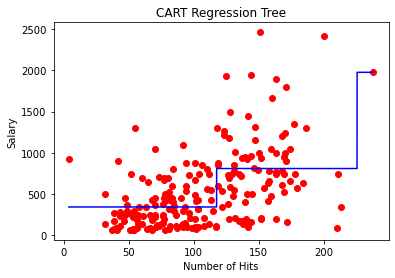

In [74]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")

plt.title("CART Regression Tree")
plt.xlabel("Number of Hits")
plt.ylabel("Salary")

In [75]:
# One independet value prediction wit Hits
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

431.29048460063217

In [76]:
# Many Independent value
df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

cart_model_2 = DecisionTreeRegressor(max_leaf_nodes=3).fit(X_train, y_train)
y_pred = cart_model_2.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

412.18941897659465

In [ ]:
# Model Tuning
?cart_model

In [78]:
cart_params = {"max_depth": [2,3,4,5,10,20], "min_samples_split": [2,10,5,30,50,10]}
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [79]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [80]:
# Final Model
cart_model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_split=50).fit(X_train, y_train)

In [81]:
y_pred = cart_cv_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

386.1879001714701

## Random Forest Algorithm

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

![Random Forest](./random-forest.jpeg)

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

- A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:

- There needs to be some actual signal in our features so that models built using those features do better than random guessing.

- The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.


**Source:**

[Towards Data Science](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [82]:
# Model & Prediction

df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)


In [83]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [ ]:
?rf_model

In [85]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

304.96267632952913

In [87]:
# Model Tuning

rf_params = {"max_depth": [5,8,10], "max_features": [2,5,10], "n_estimators": [200,500, 1000, 2000], "min_samples_split": [2,10,80,100]}

In [88]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv =10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.4min finished


In [90]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [92]:
# Final Model
rf_model = RandomForestRegressor(random_state=42, max_depth=8, max_features=2, min_samples_split=2, n_estimators=200)
rf_tuned = rf_model.fit(X_train, y_train)

In [93]:
# Final Model
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

323.2818281763631

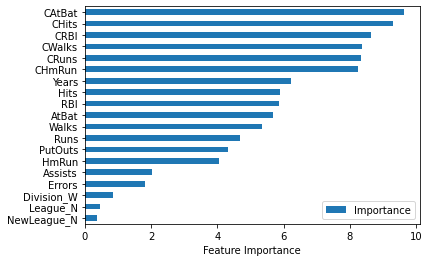

In [96]:
# Feature Importance
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                            index = X_train.columns)

importance.sort_values(by = "Importance", axis= 0, ascending=True).plot(kind="barh")
plt.xlabel("Feature Importance")
plt.gca().legend = None

## Gradient Boosting Machines

What is Gradient Boosting?
Let’s start by understanding Boosting! Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. For example, if we are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices. Similarly, if our goal is to classify credit defaults, then the loss function would be a measure of how good our predictive model is at classifying bad loans. One of the biggest motivations of using gradient boosting is that it allows one to optimise a user specified cost function, instead of a loss function that usually offers less control and does not essentially correspond with real world applications.

![Gradient boosting](./gradient-boosting.png)


**Source:**

[Towards Data Science](https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab)

[Akira AI](https://www.akira.ai/glossary/gradient-boosting/)

In [97]:
# Model & Prediction

df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [98]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
?gbm_model

In [100]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

293.0789707189119

In [101]:
# Model Tuning
gbm_params = {"learning_rate": [0.001,0.1,0.01], "max_depth": [3,5,8], "n_estimators": [100,200,500], "subsample": [1,0.5,0.8], "loss": ["ls", "lad", "quantile"] }

In [102]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  2.8min finished


In [103]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1}

In [105]:
gbm_tuned_model = GradientBoostingRegressor(learning_rate=0.1, loss= "lad", max_depth=5, n_estimators=200, subsample=1).fit(X_train, y_train)
y_pred = gbm_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

302.69359180647876

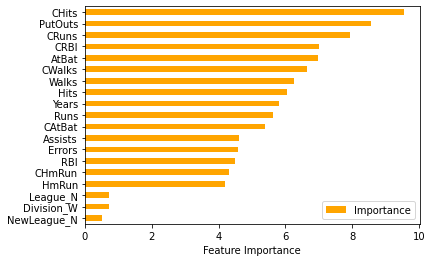

In [110]:
# Feature Importance
importance = pd.DataFrame({"Importance": gbm_tuned_model.feature_importances_*100},
                            index = X_train.columns)

importance.sort_values(by = "Importance", axis= 0, ascending=True).plot(kind="barh", color = "orange")
plt.xlabel("Feature Importance")
plt.gca().legend = None

# XGBoost Algorithm

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. 

![XGBoost](./xgboost.jpeg)

The algorithm differentiates itself in the following ways:

- A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

- Portability: Runs smoothly on Windows, Linux, and OS X.

- Languages: Supports all major programming languages including C++, Python, R, Java, Scala, and Julia.

- Cloud Integration: Supports AWS, Azure, and Yarn clusters and works well with Flink, Spark, and other ecosystems.

Each step of the evolution of tree-based algorithms can be viewed as below.

- **Decision Tree:** Every hiring manager has a set of criteria such as education level, number of years of experience, interview performance. A decision tree is analogous to a hiring manager interviewing candidates based on his or her own criteria.

- **Bagging:** Now imagine instead of a single interviewer, now there is an interview panel where each interviewer has a vote. Bagging or bootstrap aggregating involves combining inputs from all interviewers for the final decision through a democratic voting process.

- **Random Forest:** It is a bagging-based algorithm with a key difference wherein only a subset of features is selected at random. In other words, every interviewer will only test the interviewee on certain randomly selected qualifications (e.g. a technical interview for testing programming skills and a behavioral interview for evaluating non-technical skills).

- **Boosting:** This is an alternative approach where each interviewer alters the evaluation criteria based on feedback from the previous interviewer. This ‘boosts’ the efficiency of the interview process by deploying a more dynamic evaluation process.

- **Gradient Boosting:** A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.

- **XGBoost:** Think of XGBoost as gradient boosting on ‘steroids’ (well it is called ‘Extreme Gradient Boosting’ for a reason!). It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

**Why does XGBoost perform so well?**

**System Optimization:**


- **Parallelization:** XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads. This switch improves algorithmic performance by offsetting any parallelization overheads in computation.


- **Tree Pruning:** The stopping criterion for tree splitting within GBM framework is greedy in nature and depends on the negative loss criterion at the point of split. XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.

- **Hardware Optimization:** This algorithm has been designed to make efficient use of hardware resources. This is accomplished by cache awareness by allocating internal buffers in each thread to store gradient statistics. Further enhancements such as ‘out-of-core’ computing optimize available disk space while handling big data-frames that do not fit into memory.

**Algorithmic Enhancements:**

- **Regularization:** It penalizes more complex models through both LASSO (L1) and Ridge (L2) regularization to prevent overfitting.

- Sparsity Awareness:** XGBoost naturally admits sparse features for inputs by automatically ‘learning’ best missing value depending on training loss and handles different types of sparsity patterns in the data more efficiently.

- **Weighted Quantile Sketch:** XGBoost employs the distributed weighted Quantile Sketch algorithm to effectively find the optimal split points among weighted datasets.

- **Cross-validation:** The algorithm comes with built-in cross-validation method at each iteration, taking away the need to explicitly program this search and to specify the exact number of boosting iterations required in a single run.

![XGBoost_2](./xgboost2.png)


**Source:**

[Towards Data Science](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d#:~:text=XGBoost%20is%20a%20decision%2Dtree,all%20other%20algorithms%20or%20frameworks.)

In [6]:
# Model & Prediction

df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [112]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 285 kB/s 


In [7]:
import xgboost
from xgboost import XGBRegressor

In [8]:
xgb = XGBRegressor().fit(X_train, y_train)

In [9]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

298.061591603747

In [10]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
"max_depth": [2,3,4,5,8],
"n_estimators": [100,200,500,1000],
"colsample_bytree": [0.4,0.7,1]}

In [13]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, verbose=2, cv=10, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 27.2min finished


In [16]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000}

## Light GBM

Light GBM is a gradient boosting framework that uses tree based learning algorithm.

**How it differs from other tree based algorithm?**

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

Below diagrams explain the implementation of LightGBM and other boosting algorithms.

Light GBM

![Light GBM](./light-gbm.png)

Other Boosting Algorithms

![Light GBM Comparison](./light-gbm-comparison.png)

The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.


**Can we use Light GBM everywhere?**

No, it is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data. Their is no threshold on the number of rows but my experience suggests me to use it only for data with 10,000+ rows

**Source:**

[Light GBM Documentation](https://lightgbm.readthedocs.io/en/latest/Installation-Guide.html#macos)

[Medium](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc)

In [14]:
# Model & Prediction

df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [ ]:
!pip install lightgbm

In [17]:
from lightgbm import LGBMRegressor

In [18]:
lgb = LGBMRegressor().fit(X_train, y_train)

In [20]:
lgb.get_params

<bound method LGBMModel.get_params of LGBMRegressor()>

In [21]:
y_pred = lgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

353.89197703728786

In [22]:
lgb_params = {"learning_rate": [0.1, 0.01, 0.5, 1],
"n_estimators": [100,200,500],
"max_depth": [2,3,5,10]}

In [23]:
lgb_cv_model = GridSearchCV(lgb, lgb_params, cv=10, verbose=2, n_jobs= -1).fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.8s finished


In [24]:
lgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [26]:
lgbm_tuned_model = LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=500).fit(X_train, y_train)

In [28]:
y_pred = lgbm_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.7822472211918

## CatBoost Algorithm

The term CatBoost is an acronym that stands for "Category” and “Boosting.” Does this mean the “Category’ in CatBoost means it only works for categorical features?

The answer is, “No.”

According to the CatBoost documentation, CatBoost supports numerical, categorical, and text features but has a good handling technique for categorical data. 

The CatBoost algorithm has quite a number of parameters to tune the features in the processing stage.

"Boosting" in CatBoost refers to the gradient boosting machine learning. Gradient boosting is a machine learning technique for regression and classification problems. 

Which produces a prediction model in an ensemble of weak prediction models, typically decision trees. 

Gradient boosting is a robust machine learning algorithm that performs well when used to provide solutions to different types of business problems such as

- Fraud detection, 
- Recommendation system, 
- Forecasting

Again, it can return an outstanding result with relatively fewer data. Unlike other machine learning algorithms that only perform well after learning from extensive data.


**Source:**

[Data Aspirant](https://dataaspirant.com/catboost-algorithm/)

In [29]:
# Model & Prediction

df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [31]:
!pip install catboost

  Using cached catboost-0.26-cp38-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (13.1 MB)
     |████████████████████████████████| 20.6 MB 6.5 MB/s 


In [32]:
from catboost import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor().fit(X_train, y_train)
y_pred = catboost.predict(X_test)


In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

311.6017907600214

In [36]:
catb_params = {"iterations": [200,500,100],
"learning_rate": [0.01,0,1],
"depth": [3,6,8]}

In [ ]:
catboost_model = CatBoostRegressor()
catb_cv_model = GridSearchCV(catboost_model, catb_params, verbose=2, n_jobs=-1).fit(X_train, y_train)

In [38]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [ ]:
# Model Tuning
catb_tuned_model = CatBoostRegressor(depth=3, iterations=500, learning_rate=0.01).fit(X_train,y_train)

In [40]:
y_pred = catb_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

333.4330573121869

# Machine Learnig Algorithms - Automatisation

In [41]:
# Model & Prediction

df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

In [48]:
def compML (df, y, alg):
    # Train-test split
    y = df[y]
    X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
    X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

    # Modelling
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "Test Error:", rmse)

In [49]:
compML(df, "Salary", SVR)

SVR Test Error: 423.8700404711011


In [50]:
models = [LGBMRegressor,
        XGBRegressor,
        GradientBoostingRegressor,
        DecisionTreeRegressor,
        RandomForestRegressor,
        MLPRegressor,
        KNeighborsRegressor,
        SVR]

In [51]:
for i in models:
    compML(df,"Salary", i)

LGBMRegressor Test Error: 353.89197703728786
XGBRegressor Test Error: 298.061591603747
GradientBoostingRegressor Test Error: 292.3936848637636
DecisionTreeRegressor Test Error: 511.45007765807685
RandomForestRegressor Test Error: 296.54312371793776
MLPRegressor Test Error: 360.32706245641475
KNeighborsRegressor Test Error: 404.7724696402799
SVR Test Error: 423.8700404711011


/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
